**IMPORTING LIBRARIES**

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [83]:
train_data = pd.read_csv('/content/fraudTest.csv')
train_data.shape

(271489, 23)

In [84]:
train_data.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0  333497.0     Mechanical engineer  1968-03-19   
1     302.0  Sales professional, IT  1990-01-17   
2   34496.0       Librarian, public  1970-10-21   
3   54767.0            Set designer  1987-07-25   
4    1126.0      Furniture designer  1955-07-06   

                          trans_num     unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1.371817e+09  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1.371817e+09  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1.371817e+09  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1.371817e+09  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1.371817e+09  44.959148  -85.884734   

   is_fraud  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 23 columns]

In [85]:
train_data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

**CHECKING FOR NULL VALUES**

In [86]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [87]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271489 entries, 0 to 271488
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             271489 non-null  int64  
 1   trans_date_trans_time  271489 non-null  object 
 2   cc_num                 271489 non-null  int64  
 3   merchant               271489 non-null  object 
 4   category               271489 non-null  object 
 5   amt                    271489 non-null  float64
 6   first                  271489 non-null  object 
 7   last                   271489 non-null  object 
 8   gender                 271489 non-null  object 
 9   street                 271489 non-null  object 
 10  city                   271489 non-null  object 
 11  state                  271489 non-null  object 
 12  zip                    271489 non-null  int64  
 13  lat                    271489 non-null  float64
 14  long                   271489 non-nu

In [89]:
train_data.drop(columns=['Unnamed: 0'],inplace=True)

In [90]:
import datetime
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data

trans_date_trans_time               cc_num  \
0        2020-06-21 12:14:25     2291163933867244   
1        2020-06-21 12:14:33     3573030041201292   
2        2020-06-21 12:14:53     3598215285024754   
3        2020-06-21 12:15:15     3591919803438423   
4        2020-06-21 12:15:17     3526826139003047   
...                      ...                  ...   
271484   2020-09-29 16:07:07      370877495212014   
271485   2020-09-29 16:07:20     3577596616955856   
271486   2020-09-29 16:07:25     4069975342931683   
271487   2020-09-29 16:07:38  4661996144291811856   
271488   2020-09-29 16:07:58       30446018552504   

                                    merchant        category    amt     first  \
0                      fraud_Kirlin and Sons   personal_care   2.86      Jeff   
1                       fraud_Sporer-Keebler   personal_care  29.84    Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28    Ashley   
3                          fraud_Haley Group        misc_pos  60.05     Brian   
4                      fraud_Johnston-Casper          travel   3.19    Nathan   
...                                      ...             ...    ...       ...   
271484    fraud_O'Connell, Botsford and Hand            home  23.46     Sarah   
271485                         fraud_Kub PLC   personal_care  10.69     David   
271486                      fraud_Conroy Ltd    shopping_pos   2.95  Kimberly   
271487        fraud_Kihn, Brakus and Goyette   personal_care  49.99     Linda   
271488                    fraud_Emmerich-Rau   personal_care  85.44   Felicia   

            last gender                        street              city  ...  \
0        Elliott      M             351 Darlene Green          Columbia  ...   
1       Williams      F              3638 Marsh Union           Altonah  ...   
2          Lopez      F          9333 Valentine Point          Bellmore  ...   
3       Williams      M   32941 Krystal Mill Apt. 552        Titusville  ...   
4         Massey      M      5783 Evan Roads Apt. 465          Falmouth  ...   
...          ...    ...                           ...               ...  ...   
271484     Clark      F  25961 Beverly Union Apt. 042  North Wilkesboro  ...   
271485    Rogers      M      265 Mullen Park Apt. 307       Summerfield  ...   
271486    Martin      F   1943 Dennis Inlet Suite 145         Hurricane  ...   
271487      Park      F       24607 Charles Mountains          Fenelton  ...   
271488    Thomas      F          47035 Murray Harbors           Achille  ...   

            lat      long  city_pop                     job         dob  \
0       33.9659  -80.9355  333497.0     Mechanical engineer  1968-03-19   
1       40.3207 -110.4360     302.0  Sales professional, IT  1990-01-17   
2       40.6729  -73.5365   34496.0       Librarian, public  1970-10-21   
3       28.5697  -80.8191   54767.0            Set designer  1987-07-25   
4       44.2529  -85.0170    1126.0      Furniture designer  1955-07-06   
...         ...       ...       ...                     ...         ...   
271484  36.2017  -81.1286   21134.0     Dispensing optician  1984-03-06   
271485  36.2245  -79.8901   14075.0       Buyer, industrial  1929-04-22   
271486  38.4257  -81.9943   21902.0                     Sub  1980-09-18   
271487  40.8555  -79.7372    2054.0    Operations geologist  1963-08-04   
271488  33.8396   -9.0000       NaN                     NaN         NaN   

                               trans_num     unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1.371817e+09  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1.371817e+09  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1.371817e+09  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1.371817e+09  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1.371817e+09  44.959148  -85.884734   
...                                  ...         

In [91]:
train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                        float64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                       float64
merch_lat                       float64
merch_long                      float64
is_fraud                        float64
dtype: object

In [92]:
train_data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [93]:
train_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

**DATA VISUALIZATION**

<Axes: xlabel='merch_long', ylabel='merch_lat'>

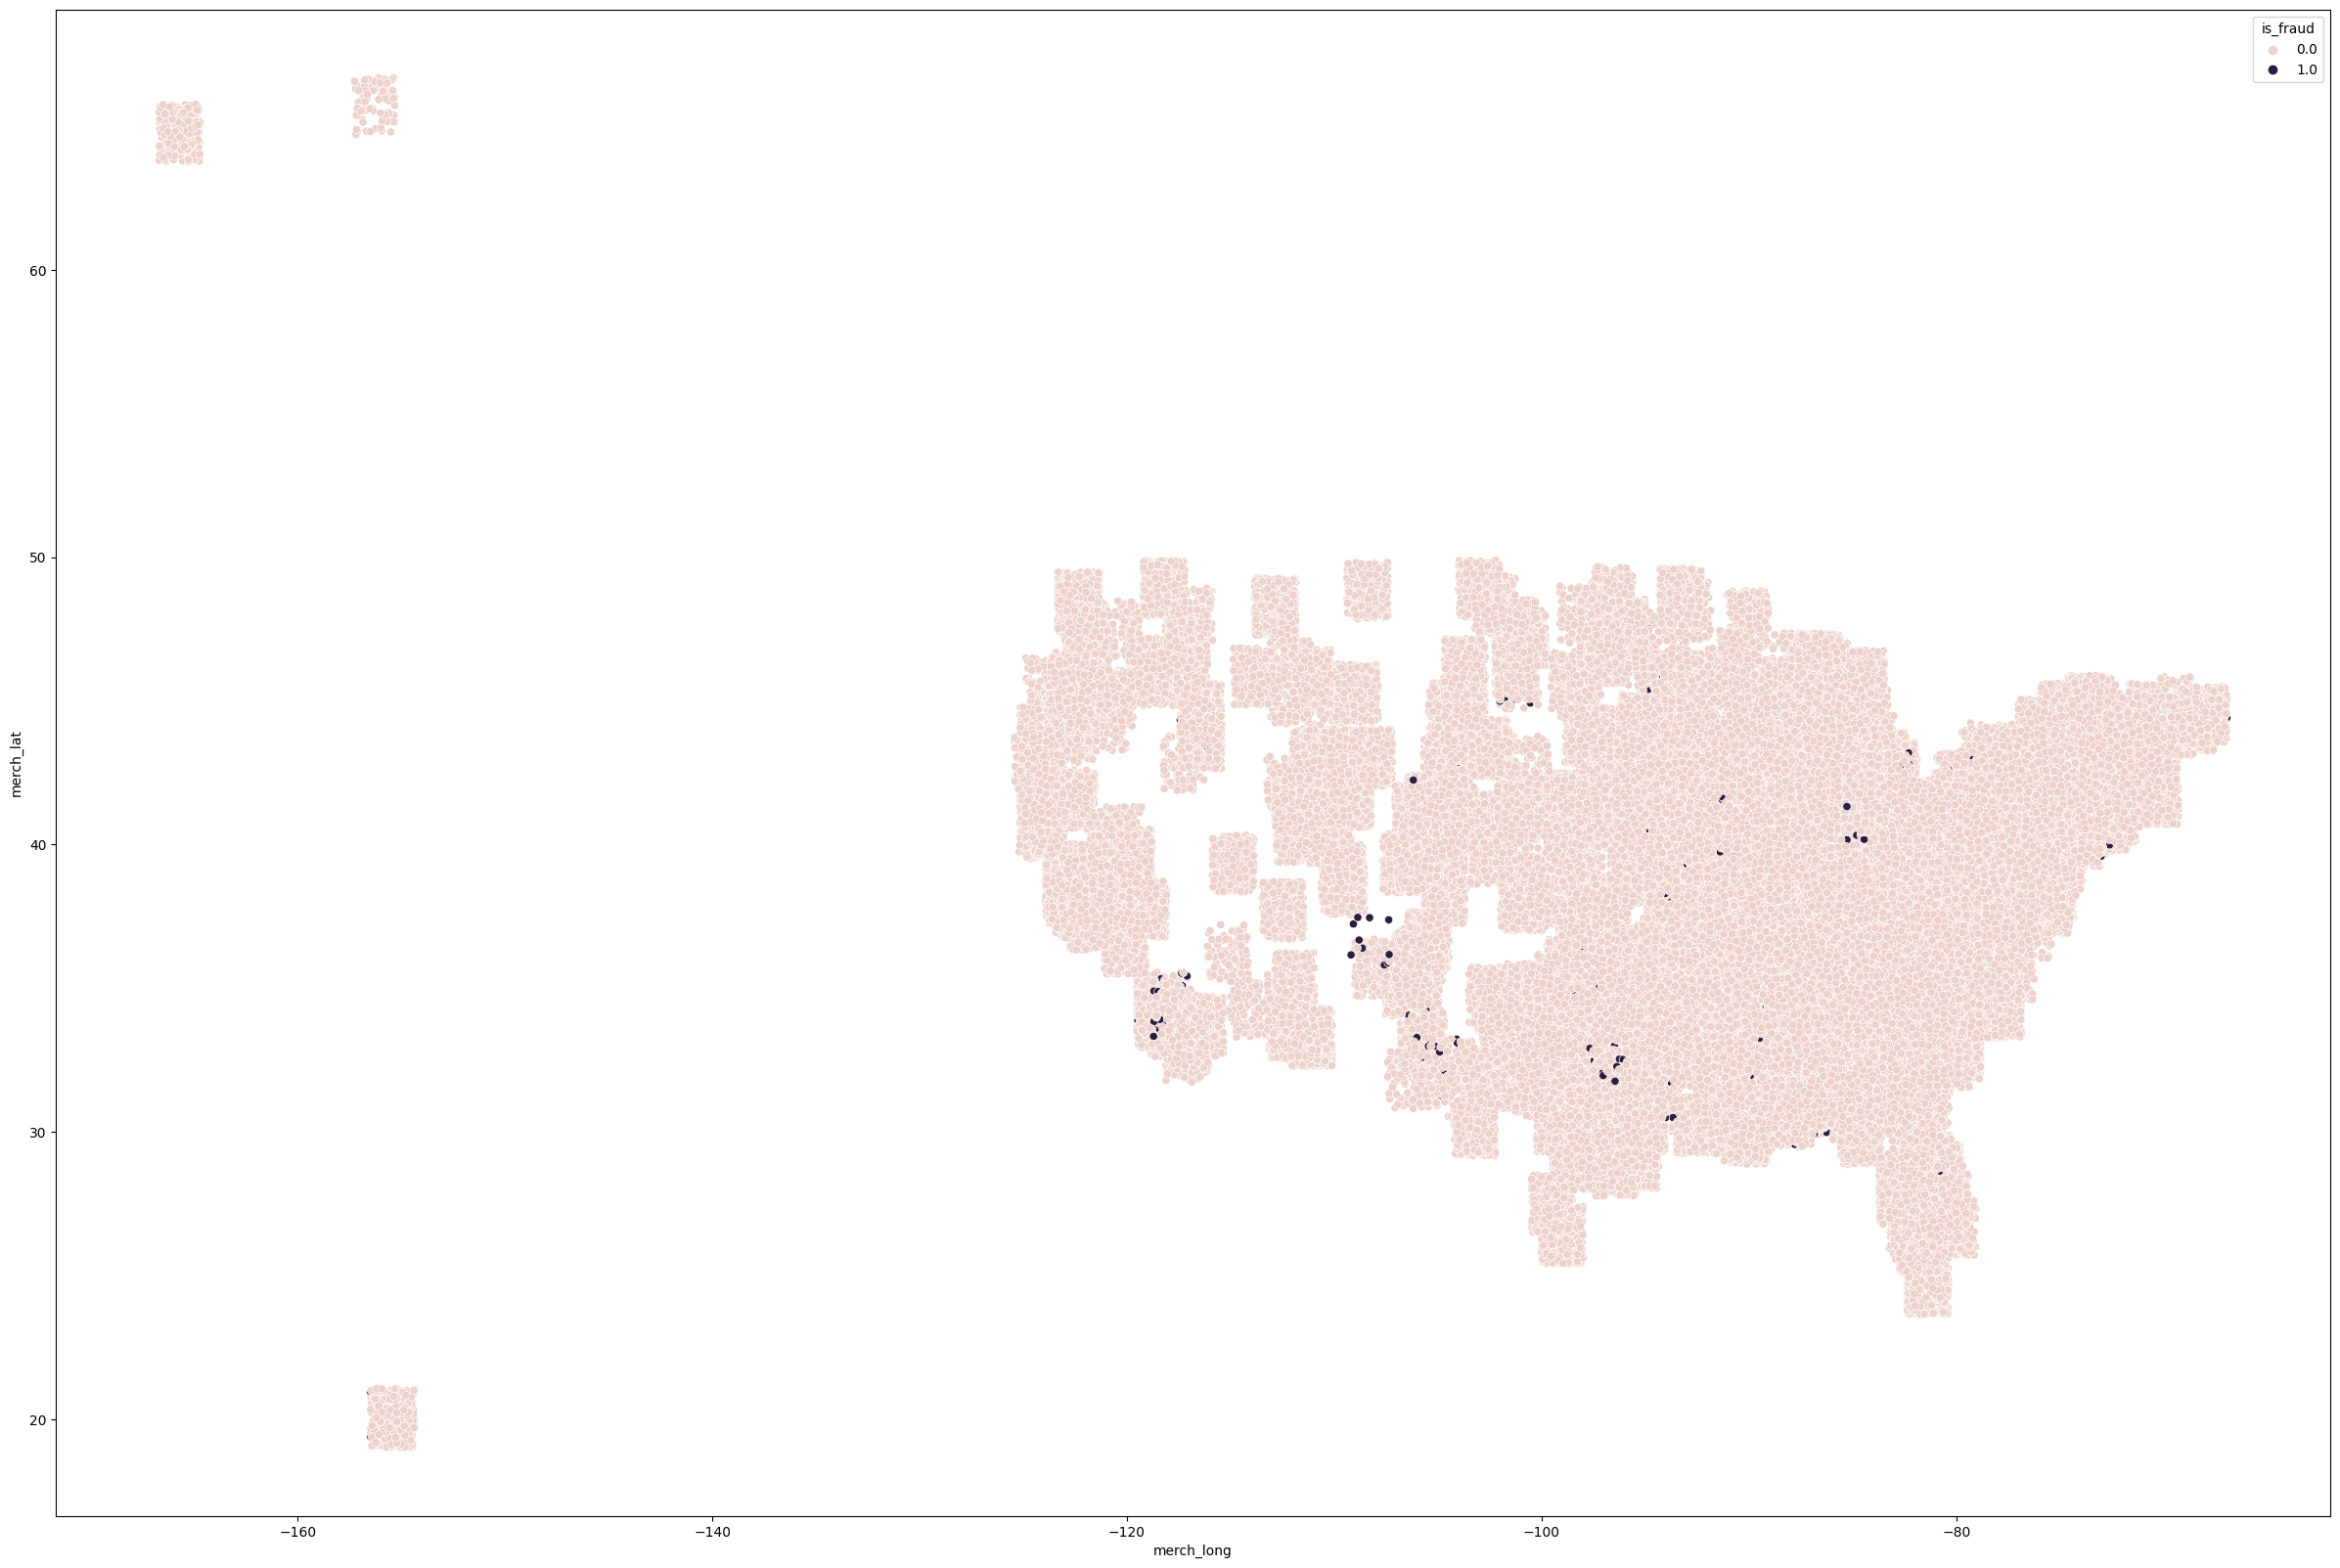

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,20))
sns.scatterplot(x=train_data['merch_long'],y=train_data['merch_lat'],data=train_data,hue=train_data['is_fraud'])

<Axes: >

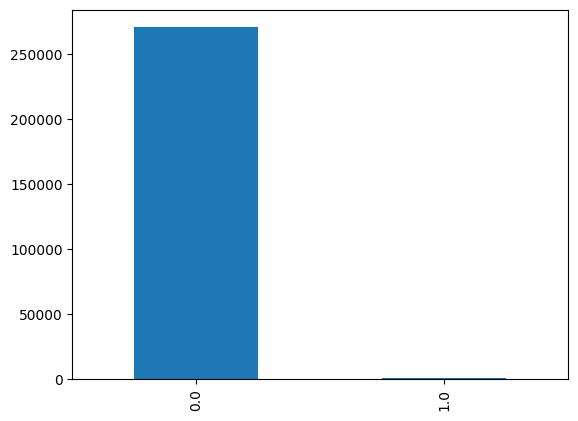

In [95]:
train_data['is_fraud'].value_counts().plot(kind='bar')

In [96]:
import folium
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [99]:
site_map = folium.Map(location=[36.011293,-82.048315], zoom_start=5)
circle = folium.Circle([36.011293,-82.048315], radius=1000, color='#d35400', fill=True)
marker = folium.map.Marker(
    [36.011293,-82.048315],
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [98]:
fraud_data = train_data[train_data['is_fraud'] == 1]
fraud_data.reset_index(drop=True,inplace=True)
fraud_data.shape

(1197, 22)

In [100]:
site_map = folium.Map(location=[36.011293,-82.048315], zoom_start=5)
def folmap(merch,k):
    circle = folium.Circle(merch, radius=1000, color='#d35400', fill=True)
    marker = folium.map.Marker(
    merch,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        )
    )
    site_map.add_child(circle)
    site_map.add_child(marker)

In [102]:
for i,j in enumerate(fraud_data.loc[:,['merch_lat','merch_long']].values):
    folmap(j,fraud_data.loc[i,'merchant'])
site_map

**DATA CLEANSING AND PREPPING**

In [103]:
train_data['category'].value_counts()

gas_transport     27589
grocery_pos       25689
home              25345
shopping_pos      24133
kids_pets         23878
shopping_net      20569
entertainment     19498
food_dining       19417
personal_care     19088
health_fitness    17918
misc_pos          17059
misc_net          13322
grocery_net        9395
travel             8589
Name: category, dtype: int64

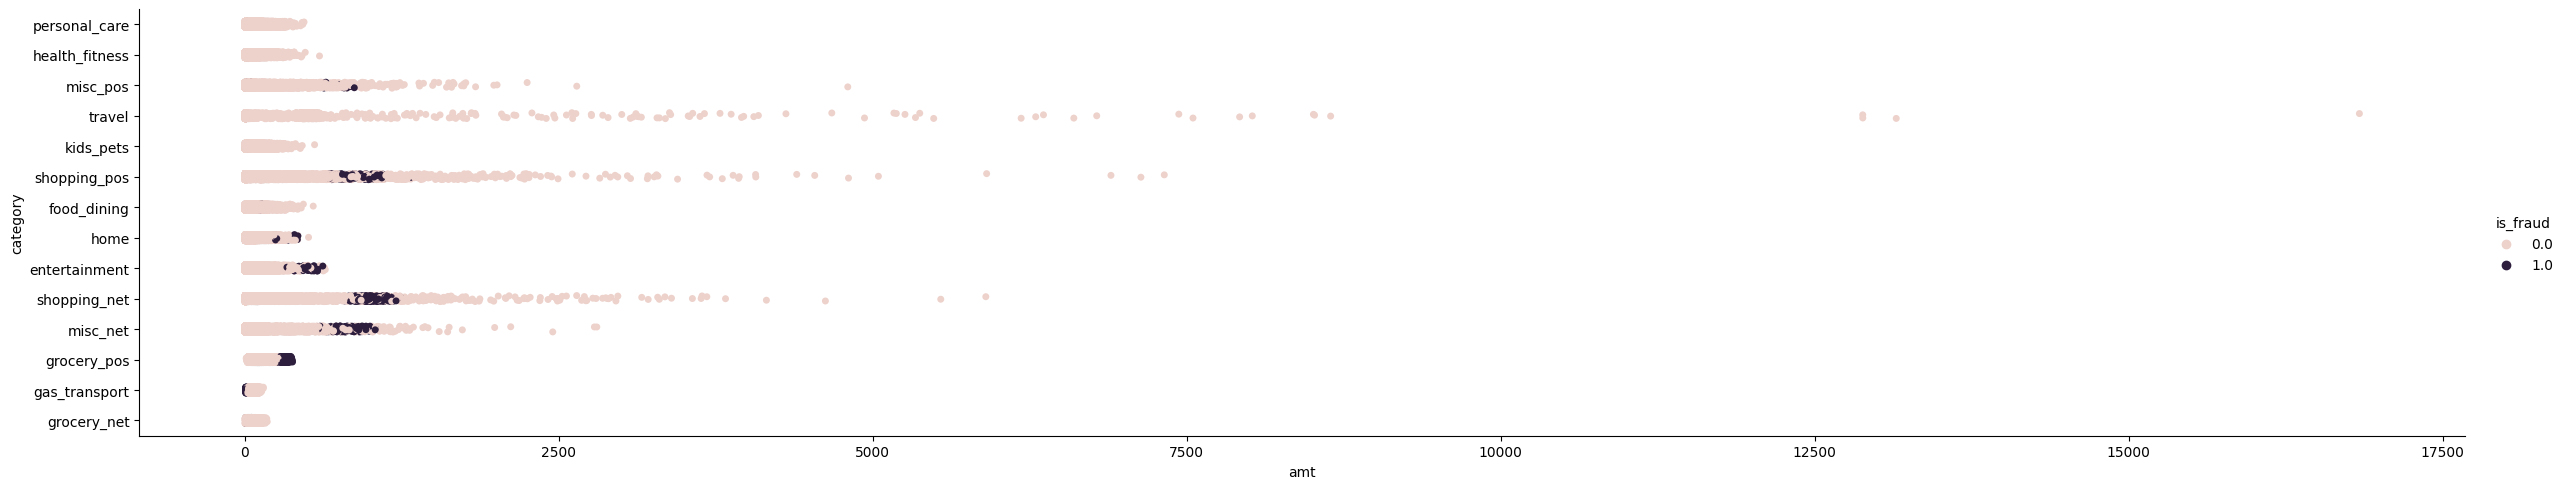

In [104]:
sns.catplot(x='amt',y='category',data=train_data,hue='is_fraud',aspect=5)

**INFERENCE ON ABOVE CAT PLOT**

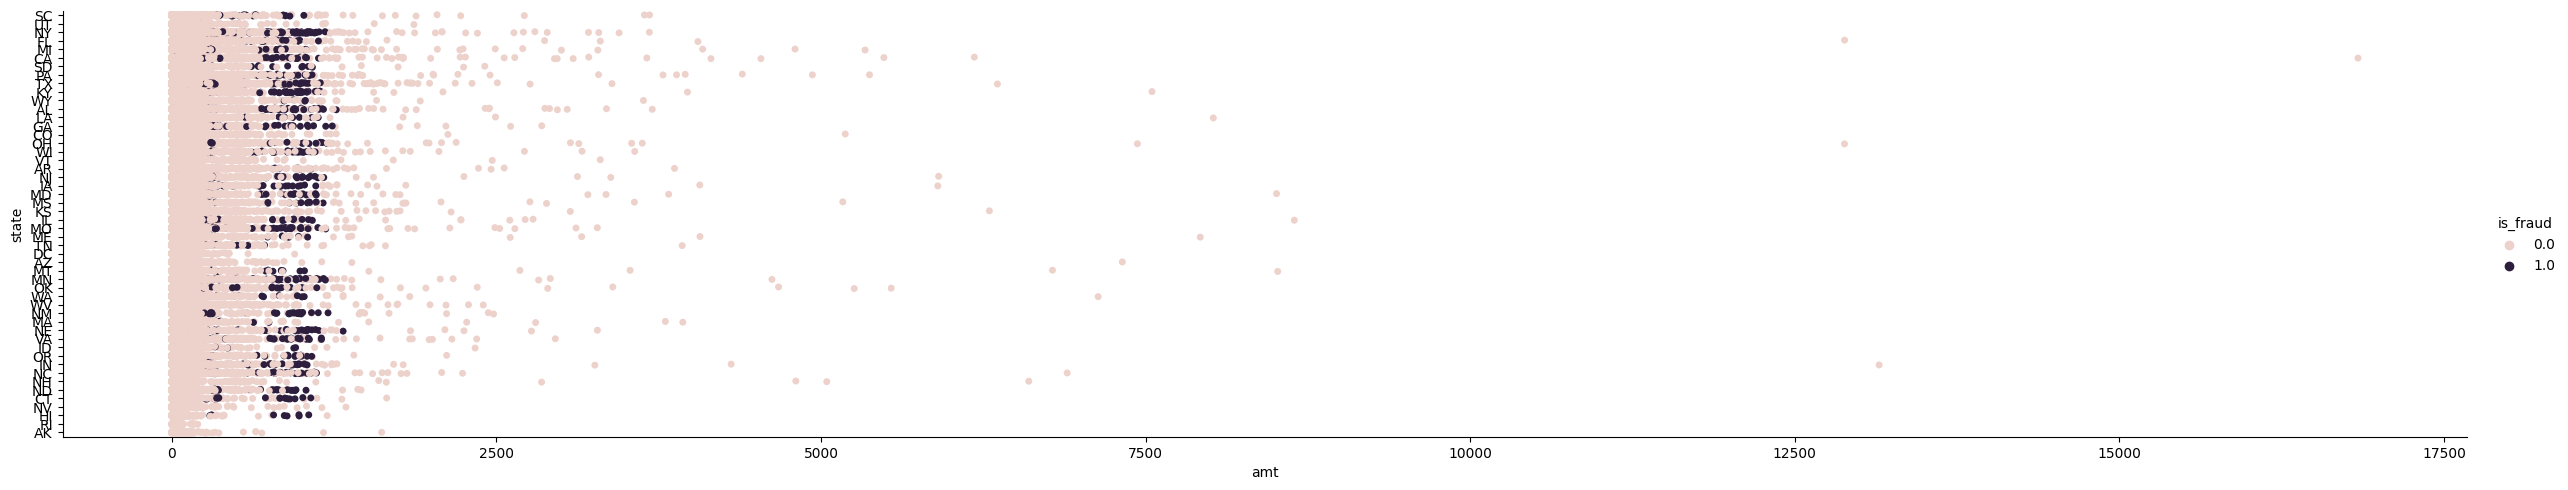

In [105]:
sns.catplot(x='amt',y='state',data=train_data,hue='is_fraud',aspect=5)

In [106]:
train_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [107]:
train_data.drop(columns=['cc_num',
       'first', 'last', 'street', 'city', 'state', 'zip',
       'dob', 'trans_num','trans_date_trans_time'],inplace=True)
train_data

merchant        category    amt gender  \
0                      fraud_Kirlin and Sons   personal_care   2.86      M   
1                       fraud_Sporer-Keebler   personal_care  29.84      F   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28      F   
3                          fraud_Haley Group        misc_pos  60.05      M   
4                      fraud_Johnston-Casper          travel   3.19      M   
...                                      ...             ...    ...    ...   
271484    fraud_O'Connell, Botsford and Hand            home  23.46      F   
271485                         fraud_Kub PLC   personal_care  10.69      M   
271486                      fraud_Conroy Ltd    shopping_pos   2.95      F   
271487        fraud_Kihn, Brakus and Goyette   personal_care  49.99      F   
271488                    fraud_Emmerich-Rau   personal_care  85.44      F   

            lat      long  city_pop                     job     unix_time  \
0       33.9659  -80.9355  333497.0     Mechanical engineer  1.371817e+09   
1       40.3207 -110.4360     302.0  Sales professional, IT  1.371817e+09   
2       40.6729  -73.5365   34496.0       Librarian, public  1.371817e+09   
3       28.5697  -80.8191   54767.0            Set designer  1.371817e+09   
4       44.2529  -85.0170    1126.0      Furniture designer  1.371817e+09   
...         ...       ...       ...                     ...           ...   
271484  36.2017  -81.1286   21134.0     Dispensing optician  1.380471e+09   
271485  36.2245  -79.8901   14075.0       Buyer, industrial  1.380471e+09   
271486  38.4257  -81.9943   21902.0                     Sub  1.380471e+09   
271487  40.8555  -79.7372    2054.0    Operations geologist  1.380471e+09   
271488  33.8396   -9.0000       NaN                     NaN           NaN   

        merch_lat  merch_long  is_fraud  
0       33.986391  -81.200714       0.0  
1       39.450498 -109.960431       0.0  
2       40.495810  -74.196111       0.0  
3       28.812398  -80.883061       0.0  
4       44.959148  -85.884734       0.0  
...           ...         ...       ...  
271484  36.799024  -81.961165       0.0  
271485  36.200679  -79.886439       0.0  
271486  38.131981  -81.653389       0.0  
271487  41.224890  -80.662891       0.0  
271488        NaN         NaN       NaN  

[271489 rows x 12 columns]

In [109]:
# Assuming train_data is your DataFrame
train_data = train_data.dropna()
train_data.reset_index(drop=True, inplace=True)


In [110]:
# Assuming train_data is your DataFrame
train_data = train_data.dropna(axis=1)


In [113]:
# Assuming train_data is your DataFrame
train_data = train_data.dropna().reset_index(drop=True)


**LABEL ENCODING**

In [114]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [115]:
train_data.columns

Index(['merchant', 'category', 'amt', 'gender', 'lat', 'long', 'city_pop',
       'job', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [116]:
cat_columns = ['merchant','category','gender','job']
for column in cat_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])
train_data

merchant  category    amt  gender      lat      long  city_pop  job  \
0            319        10   2.86       1  33.9659  -80.9355  333497.0  275   
1            591        10  29.84       0  40.3207 -110.4360     302.0  392   
2            611         5  41.28       0  40.6729  -73.5365   34496.0  259   
3            222         9  60.05       1  28.5697  -80.8191   54767.0  407   
4            292        13   3.19       1  44.2529  -85.0170    1126.0  196   
...          ...       ...    ...     ...      ...       ...       ...  ...   
271483       370         1  13.49       0  43.5336  -95.6515     399.0  132   
271484       456         6  23.46       0  36.2017  -81.1286   21134.0  126   
271485       343        10  10.69       1  36.2245  -79.8901   14075.0   52   
271486       101        12   2.95       0  38.4257  -81.9943   21902.0  422   
271487       312        10  49.99       0  40.8555  -79.7372    2054.0  309   

           unix_time  merch_lat  merch_long  is_fraud  
0       1.371817e+09  33.986391  -81.200714       0.0  
1       1.371817e+09  39.450498 -109.960431       0.0  
2       1.371817e+09  40.495810  -74.196111       0.0  
3       1.371817e+09  28.812398  -80.883061       0.0  
4       1.371817e+09  44.959148  -85.884734       0.0  
...              ...        ...         ...       ...  
271483  1.380471e+09  43.246682  -96.262999       0.0  
271484  1.380471e+09  36.799024  -81.961165       0.0  
271485  1.380471e+09  36.200679  -79.886439       0.0  
271486  1.380471e+09  38.131981  -81.653389       0.0  
271487  1.380471e+09  41.224890  -80.662891       0.0  

[271488 rows x 12 columns]

**LOGISTIC REGRESSION CLASSIFIER FOR TRAINING THE MODEL**

In [117]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()

In [118]:
train_data.head()

merchant  category    amt  gender      lat      long  city_pop  job  \
0       319        10   2.86       1  33.9659  -80.9355  333497.0  275   
1       591        10  29.84       0  40.3207 -110.4360     302.0  392   
2       611         5  41.28       0  40.6729  -73.5365   34496.0  259   
3       222         9  60.05       1  28.5697  -80.8191   54767.0  407   
4       292        13   3.19       1  44.2529  -85.0170    1126.0  196   

      unix_time  merch_lat  merch_long  is_fraud  
0  1.371817e+09  33.986391  -81.200714       0.0  
1  1.371817e+09  39.450498 -109.960431       0.0  
2  1.371817e+09  40.495810  -74.196111       0.0  
3  1.371817e+09  28.812398  -80.883061       0.0  
4  1.371817e+09  44.959148  -85.884734       0.0

In [119]:
X_train = train_data.iloc[:,0:11]
X_train

merchant  category    amt  gender      lat      long  city_pop  job  \
0            319        10   2.86       1  33.9659  -80.9355  333497.0  275   
1            591        10  29.84       0  40.3207 -110.4360     302.0  392   
2            611         5  41.28       0  40.6729  -73.5365   34496.0  259   
3            222         9  60.05       1  28.5697  -80.8191   54767.0  407   
4            292        13   3.19       1  44.2529  -85.0170    1126.0  196   
...          ...       ...    ...     ...      ...       ...       ...  ...   
271483       370         1  13.49       0  43.5336  -95.6515     399.0  132   
271484       456         6  23.46       0  36.2017  -81.1286   21134.0  126   
271485       343        10  10.69       1  36.2245  -79.8901   14075.0   52   
271486       101        12   2.95       0  38.4257  -81.9943   21902.0  422   
271487       312        10  49.99       0  40.8555  -79.7372    2054.0  309   

           unix_time  merch_lat  merch_long  
0       1.371817e+09  33.986391  -81.200714  
1       1.371817e+09  39.450498 -109.960431  
2       1.371817e+09  40.495810  -74.196111  
3       1.371817e+09  28.812398  -80.883061  
4       1.371817e+09  44.959148  -85.884734  
...              ...        ...         ...  
271483  1.380471e+09  43.246682  -96.262999  
271484  1.380471e+09  36.799024  -81.961165  
271485  1.380471e+09  36.200679  -79.886439  
271486  1.380471e+09  38.131981  -81.653389  
271487  1.380471e+09  41.224890  -80.662891  

[271488 rows x 11 columns]

In [120]:
y_train = train_data['is_fraud']
y_train

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
271483    0.0
271484    0.0
271485    0.0
271486    0.0
271487    0.0
Name: is_fraud, Length: 271488, dtype: float64

In [121]:
Lr.fit(X_train, y_train)

LogisticRegression()

In [122]:
y_pred = Lr.predict(X_train)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [123]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,y_pred)
accuracy

0.9955909653465347

**PREDICTING USING THE MODEL**

In [125]:
test_data = pd.read_csv('/content/fraudTest.csv')
test_data

Unnamed: 0 trans_date_trans_time               cc_num  \
0                0   2020-06-21 12:14:25     2291163933867244   
1                1   2020-06-21 12:14:33     3573030041201292   
2                2   2020-06-21 12:14:53     3598215285024754   
3                3   2020-06-21 12:15:15     3591919803438423   
4                4   2020-06-21 12:15:17     3526826139003047   
...            ...                   ...                  ...   
271484      271484   2020-09-29 16:07:07      370877495212014   
271485      271485   2020-09-29 16:07:20     3577596616955856   
271486      271486   2020-09-29 16:07:25     4069975342931683   
271487      271487   2020-09-29 16:07:38  4661996144291811856   
271488      271488   2020-09-29 16:07:58       30446018552504   

                                    merchant        category    amt     first  \
0                      fraud_Kirlin and Sons   personal_care   2.86      Jeff   
1                       fraud_Sporer-Keebler   personal_care  29.84    Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28    Ashley   
3                          fraud_Haley Group        misc_pos  60.05     Brian   
4                      fraud_Johnston-Casper          travel   3.19    Nathan   
...                                      ...             ...    ...       ...   
271484    fraud_O'Connell, Botsford and Hand            home  23.46     Sarah   
271485                         fraud_Kub PLC   personal_care  10.69     David   
271486                      fraud_Conroy Ltd    shopping_pos   2.95  Kimberly   
271487        fraud_Kihn, Brakus and Goyette   personal_care  49.99     Linda   
271488                    fraud_Emmerich-Rau   personal_care  85.44   Felicia   

            last gender                        street  ...      lat      long  \
0        Elliott      M             351 Darlene Green  ...  33.9659  -80.9355   
1       Williams      F              3638 Marsh Union  ...  40.3207 -110.4360   
2          Lopez      F          9333 Valentine Point  ...  40.6729  -73.5365   
3       Williams      M   32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4         Massey      M      5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   
...          ...    ...                           ...  ...      ...       ...   
271484     Clark      F  25961 Beverly Union Apt. 042  ...  36.2017  -81.1286   
271485    Rogers      M      265 Mullen Park Apt. 307  ...  36.2245  -79.8901   
271486    Martin      F   1943 Dennis Inlet Suite 145  ...  38.4257  -81.9943   
271487      Park      F       24607 Charles Mountains  ...  40.8555  -79.7372   
271488    Thomas      F          47035 Murray Harbors  ...  33.8396   -9.0000   

        city_pop                     job         dob  \
0       333497.0     Mechanical engineer  1968-03-19   
1          302.0  Sales professional, IT  1990-01-17   
2        34496.0       Librarian, public  1970-10-21   
3        54767.0            Set designer  1987-07-25   
4         1126.0      Furniture designer  1955-07-06   
...          ...                     ...         ...   
271484   21134.0     Dispensing optician  1984-03-06   
271485   14075.0       Buyer, industrial  1929-04-22   
271486   21902.0                     Sub  1980-09-18   
271487    2054.0    Operations geologist  1963-08-04   
271488       NaN                     NaN         NaN   

                               trans_num     unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1.371817e+09  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1.371817e+09  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1.371817e+09  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1.371817e+09  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1.371817e+09  44.959148  -85.884734   
...                                  ...           ...        ...         ...   
271484  99702b00662d7c5bb692f2d39099b116 

In [126]:
test_data.drop(columns=['Unnamed: 0'],inplace=True)

In [127]:
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data

trans_date_trans_time               cc_num  \
0        2020-06-21 12:14:25     2291163933867244   
1        2020-06-21 12:14:33     3573030041201292   
2        2020-06-21 12:14:53     3598215285024754   
3        2020-06-21 12:15:15     3591919803438423   
4        2020-06-21 12:15:17     3526826139003047   
...                      ...                  ...   
271484   2020-09-29 16:07:07      370877495212014   
271485   2020-09-29 16:07:20     3577596616955856   
271486   2020-09-29 16:07:25     4069975342931683   
271487   2020-09-29 16:07:38  4661996144291811856   
271488   2020-09-29 16:07:58       30446018552504   

                                    merchant        category    amt     first  \
0                      fraud_Kirlin and Sons   personal_care   2.86      Jeff   
1                       fraud_Sporer-Keebler   personal_care  29.84    Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28    Ashley   
3                          fraud_Haley Group        misc_pos  60.05     Brian   
4                      fraud_Johnston-Casper          travel   3.19    Nathan   
...                                      ...             ...    ...       ...   
271484    fraud_O'Connell, Botsford and Hand            home  23.46     Sarah   
271485                         fraud_Kub PLC   personal_care  10.69     David   
271486                      fraud_Conroy Ltd    shopping_pos   2.95  Kimberly   
271487        fraud_Kihn, Brakus and Goyette   personal_care  49.99     Linda   
271488                    fraud_Emmerich-Rau   personal_care  85.44   Felicia   

            last gender                        street              city  ...  \
0        Elliott      M             351 Darlene Green          Columbia  ...   
1       Williams      F              3638 Marsh Union           Altonah  ...   
2          Lopez      F          9333 Valentine Point          Bellmore  ...   
3       Williams      M   32941 Krystal Mill Apt. 552        Titusville  ...   
4         Massey      M      5783 Evan Roads Apt. 465          Falmouth  ...   
...          ...    ...                           ...               ...  ...   
271484     Clark      F  25961 Beverly Union Apt. 042  North Wilkesboro  ...   
271485    Rogers      M      265 Mullen Park Apt. 307       Summerfield  ...   
271486    Martin      F   1943 Dennis Inlet Suite 145         Hurricane  ...   
271487      Park      F       24607 Charles Mountains          Fenelton  ...   
271488    Thomas      F          47035 Murray Harbors           Achille  ...   

            lat      long  city_pop                     job         dob  \
0       33.9659  -80.9355  333497.0     Mechanical engineer  1968-03-19   
1       40.3207 -110.4360     302.0  Sales professional, IT  1990-01-17   
2       40.6729  -73.5365   34496.0       Librarian, public  1970-10-21   
3       28.5697  -80.8191   54767.0            Set designer  1987-07-25   
4       44.2529  -85.0170    1126.0      Furniture designer  1955-07-06   
...         ...       ...       ...                     ...         ...   
271484  36.2017  -81.1286   21134.0     Dispensing optician  1984-03-06   
271485  36.2245  -79.8901   14075.0       Buyer, industrial  1929-04-22   
271486  38.4257  -81.9943   21902.0                     Sub  1980-09-18   
271487  40.8555  -79.7372    2054.0    Operations geologist  1963-08-04   
271488  33.8396   -9.0000       NaN                     NaN         NaN   

                               trans_num     unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1.371817e+09  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1.371817e+09  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1.371817e+09  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1.371817e+09  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1.371817e+09  44.959148  -85.884734   
...                                  ...         

In [128]:
test_data['dob'] = pd.to_datetime(test_data['dob'])
test_data.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                        float64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                       float64
merch_lat                       float64
merch_long                      float64
is_fraud                        float64
dtype: object

In [129]:
test_data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [130]:
test_data.drop(columns=['cc_num',
       'first', 'last', 'street', 'city', 'state', 'zip',
       'dob', 'trans_num','trans_date_trans_time'],inplace=True)
test_data

merchant        category    amt gender  \
0                      fraud_Kirlin and Sons   personal_care   2.86      M   
1                       fraud_Sporer-Keebler   personal_care  29.84      F   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28      F   
3                          fraud_Haley Group        misc_pos  60.05      M   
4                      fraud_Johnston-Casper          travel   3.19      M   
...                                      ...             ...    ...    ...   
271484    fraud_O'Connell, Botsford and Hand            home  23.46      F   
271485                         fraud_Kub PLC   personal_care  10.69      M   
271486                      fraud_Conroy Ltd    shopping_pos   2.95      F   
271487        fraud_Kihn, Brakus and Goyette   personal_care  49.99      F   
271488                    fraud_Emmerich-Rau   personal_care  85.44      F   

            lat      long  city_pop                     job     unix_time  \
0       33.9659  -80.9355  333497.0     Mechanical engineer  1.371817e+09   
1       40.3207 -110.4360     302.0  Sales professional, IT  1.371817e+09   
2       40.6729  -73.5365   34496.0       Librarian, public  1.371817e+09   
3       28.5697  -80.8191   54767.0            Set designer  1.371817e+09   
4       44.2529  -85.0170    1126.0      Furniture designer  1.371817e+09   
...         ...       ...       ...                     ...           ...   
271484  36.2017  -81.1286   21134.0     Dispensing optician  1.380471e+09   
271485  36.2245  -79.8901   14075.0       Buyer, industrial  1.380471e+09   
271486  38.4257  -81.9943   21902.0                     Sub  1.380471e+09   
271487  40.8555  -79.7372    2054.0    Operations geologist  1.380471e+09   
271488  33.8396   -9.0000       NaN                     NaN           NaN   

        merch_lat  merch_long  is_fraud  
0       33.986391  -81.200714       0.0  
1       39.450498 -109.960431       0.0  
2       40.495810  -74.196111       0.0  
3       28.812398  -80.883061       0.0  
4       44.959148  -85.884734       0.0  
...           ...         ...       ...  
271484  36.799024  -81.961165       0.0  
271485  36.200679  -79.886439       0.0  
271486  38.131981  -81.653389       0.0  
271487  41.224890  -80.662891       0.0  
271488        NaN         NaN       NaN  

[271489 rows x 12 columns]

In [131]:
cat_columns = ['merchant','category','gender','job']
for column in cat_columns:
    test_data[column] = label_encoder.fit_transform(test_data[column])
test_data

merchant  category    amt  gender      lat      long  city_pop  job  \
0            319        10   2.86       1  33.9659  -80.9355  333497.0  275   
1            591        10  29.84       0  40.3207 -110.4360     302.0  392   
2            611         5  41.28       0  40.6729  -73.5365   34496.0  259   
3            222         9  60.05       1  28.5697  -80.8191   54767.0  407   
4            292        13   3.19       1  44.2529  -85.0170    1126.0  196   
...          ...       ...    ...     ...      ...       ...       ...  ...   
271484       456         6  23.46       0  36.2017  -81.1286   21134.0  126   
271485       343        10  10.69       1  36.2245  -79.8901   14075.0   52   
271486       101        12   2.95       0  38.4257  -81.9943   21902.0  422   
271487       312        10  49.99       0  40.8555  -79.7372    2054.0  309   
271488       159        10  85.44       0  33.8396   -9.0000       NaN  478   

           unix_time  merch_lat  merch_long  is_fraud  
0       1.371817e+09  33.986391  -81.200714       0.0  
1       1.371817e+09  39.450498 -109.960431       0.0  
2       1.371817e+09  40.495810  -74.196111       0.0  
3       1.371817e+09  28.812398  -80.883061       0.0  
4       1.371817e+09  44.959148  -85.884734       0.0  
...              ...        ...         ...       ...  
271484  1.380471e+09  36.799024  -81.961165       0.0  
271485  1.380471e+09  36.200679  -79.886439       0.0  
271486  1.380471e+09  38.131981  -81.653389       0.0  
271487  1.380471e+09  41.224890  -80.662891       0.0  
271488           NaN        NaN         NaN       NaN  

[271489 rows x 12 columns]

In [132]:
X_test = test_data.iloc[:,0:11]
X_test

merchant  category    amt  gender      lat      long  city_pop  job  \
0            319        10   2.86       1  33.9659  -80.9355  333497.0  275   
1            591        10  29.84       0  40.3207 -110.4360     302.0  392   
2            611         5  41.28       0  40.6729  -73.5365   34496.0  259   
3            222         9  60.05       1  28.5697  -80.8191   54767.0  407   
4            292        13   3.19       1  44.2529  -85.0170    1126.0  196   
...          ...       ...    ...     ...      ...       ...       ...  ...   
271484       456         6  23.46       0  36.2017  -81.1286   21134.0  126   
271485       343        10  10.69       1  36.2245  -79.8901   14075.0   52   
271486       101        12   2.95       0  38.4257  -81.9943   21902.0  422   
271487       312        10  49.99       0  40.8555  -79.7372    2054.0  309   
271488       159        10  85.44       0  33.8396   -9.0000       NaN  478   

           unix_time  merch_lat  merch_long  
0       1.371817e+09  33.986391  -81.200714  
1       1.371817e+09  39.450498 -109.960431  
2       1.371817e+09  40.495810  -74.196111  
3       1.371817e+09  28.812398  -80.883061  
4       1.371817e+09  44.959148  -85.884734  
...              ...        ...         ...  
271484  1.380471e+09  36.799024  -81.961165  
271485  1.380471e+09  36.200679  -79.886439  
271486  1.380471e+09  38.131981  -81.653389  
271487  1.380471e+09  41.224890  -80.662891  
271488           NaN        NaN         NaN  

[271489 rows x 11 columns]

**EVALUATING THE MODEL**

In [140]:
# Drop rows with NaN values
test_data= test_data.dropna()

# Drop columns with NaN values
test_data = test_data.dropna(axis=1)


In [138]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)
X_train_imputed = imputer.transform(X_train)


In [143]:
accuracy1 = accuracy_score(test_data['is_fraud'],y_pred)
accuracy1

0.9955909653465347